In [1]:
import numpy as np, matplotlib.pyplot as plt, itertools, networkx as nx
from sympy import *
from mpl_toolkits.mplot3d import Axes3D
from sympy.vector import *

# Exercise 1:
Compute all first and second order partial derivatives of the following:

$x^{2} + y^{2} = sin(xy)$

$\frac{x}{y}e^{x^{2}+y^{2}}$

$e^{x}cos(y)$

$\frac{\partial}{\partial x} [x^{2} + y^{2} = sin(xy)] =[2x = ycos(xy)]$

$\frac{\partial^{2}}{\partial x^{2}} [x^{2} + y^{2} = sin(xy)] =[2 = -y^{2}sin(xy)]$

$\frac{\partial}{\partial y} [x^{2} + y^{2} = sin(xy)]=[2y = xcos(xy)]$

$\frac{\partial^{2}}{\partial y^{2}} [x^{2} + y^{2} = sin(xy)] =[2 = -x^{2}sin(xy)]$

$\frac{\partial^{2}}{\partial xy} [x^{2} + y^{2} = sin(xy)] = \frac{\partial^{2}}{\partial yx} [x^{2} + y^{2} = sin(xy)]= [0 = cos(xy) -yxsin(xy)]$

$\frac{\partial}{\partial x} \frac{x}{y}e^{(x^{2}+y^{2})} = \frac{1}{y}e^{(x^{2}+y^{2})} + \frac{2x^{2}}{y}e^{(x^{2} + y^{2})}$

$\frac{\partial^{2}}{\partial x^{2}} e^{(x^{2}+y^{2})} = \frac{2x}{y}[2x^{2} + 3]e^{(x^{2}+y^{2})}$

$\frac{\partial}{\partial y}e^{(x^{2}+y^{2})} = 2xe^{(x^{2}+y^{2})} - \frac{xe^{(x^{2}+y^{2})}}{y^{2}}$

$\frac{\partial^{2}}{\partial y^{2}} e^{(x^{2}+y^{2})} = \frac{2x}{y}(2y^{2}-1+\frac{1}{y^{2}})e^{(x^{2}+y^{2})}$

$\frac{\partial^{2}}{\partial xy}e^{(x^{2}+y^{2})} = \frac{\partial^{2}}{\partial yx}e^{(x^{2}+y^{2})} = [4x^{2} - \frac{2x^{2}}{y^{2}} + 2 - \frac{1}{y^{2}}]\frac{x}{y}e^{(x^{2}+y^{2})}$

$\frac{\partial}{\partial x} e^{x}cos(y) = e^{x} \cos{\left(y \right)}$

$\frac{\partial^{2}}{\partial x^{2}} e^{x}cos(y) = e^{x} \cos{\left(y \right)}$

$\frac{\partial}{\partial y} e^{x}cos(y) =  - e^{x} \sin{\left(y \right)}$

$\frac{\partial^{2}}{\partial y^{2}} e^{x}cos(y) = - e^{x} \cos{\left(y \right)}$

$\frac{\partial^{2}}{\partial yx} e^{x}cos(y) = \frac{\partial^{2}}{\partial xy} e^{x}cos(y) = - e^{x} \sin{\left(y \right)}$

In [2]:
# checking all solutions

x, y = symbols('x y')

funcs = [x**2 + y**2, sin(x*y), x/y*exp(x**2+y**2) , exp(x)*cos(y)]

for f in funcs:
    elements = [x,y]
    for combo in list(itertools.product(elements, repeat=1)) + list(itertools.product(elements, repeat=2)):
        if len(combo) == 1:
            print(f'df/d{combo[0]}[{sympify(f)}] = {diff(f, combo[0])}')
        else:
            print(f'd2f/d{combo[0], combo[1]}[{sympify(f)}] = {diff(f, combo[0], combo[1])}')

df/dx[x**2 + y**2] = 2*x
df/dy[x**2 + y**2] = 2*y
d2f/d(x, x)[x**2 + y**2] = 2
d2f/d(x, y)[x**2 + y**2] = 0
d2f/d(y, x)[x**2 + y**2] = 0
d2f/d(y, y)[x**2 + y**2] = 2
df/dx[sin(x*y)] = y*cos(x*y)
df/dy[sin(x*y)] = x*cos(x*y)
d2f/d(x, x)[sin(x*y)] = -y**2*sin(x*y)
d2f/d(x, y)[sin(x*y)] = -x*y*sin(x*y) + cos(x*y)
d2f/d(y, x)[sin(x*y)] = -x*y*sin(x*y) + cos(x*y)
d2f/d(y, y)[sin(x*y)] = -x**2*sin(x*y)
df/dx[x*exp(x**2 + y**2)/y] = 2*x**2*exp(x**2 + y**2)/y + exp(x**2 + y**2)/y
df/dy[x*exp(x**2 + y**2)/y] = 2*x*exp(x**2 + y**2) - x*exp(x**2 + y**2)/y**2
d2f/d(x, x)[x*exp(x**2 + y**2)/y] = 2*x*(2*x**2 + 3)*exp(x**2 + y**2)/y
d2f/d(x, y)[x*exp(x**2 + y**2)/y] = (4*x**2 - 2*x**2/y**2 + 2 - 1/y**2)*exp(x**2 + y**2)
d2f/d(y, x)[x*exp(x**2 + y**2)/y] = (4*x**2 - 2*x**2/y**2 + 2 - 1/y**2)*exp(x**2 + y**2)
d2f/d(y, y)[x*exp(x**2 + y**2)/y] = 2*x*(2*y**2 - 1 + y**(-2))*exp(x**2 + y**2)/y
df/dx[exp(x)*cos(y)] = exp(x)*cos(y)
df/dy[exp(x)*cos(y)] = -exp(x)*sin(y)
d2f/d(x, x)[exp(x)*cos(y)] = exp(x)*cos

# Exercise 2
Determining the stationary points of the following values and functions:

$(x=\frac{\pi}{2}, y = -\frac{\pi}{2})$

$(x=-\frac{\pi}{2}, y = \frac{\pi}{2})$

$(x=-\frac{\pi}{2}, y = -\frac{\pi}{2})$

$F(x,y) = sin(x) + sin(y)$

$F(x,y) = cos(x) + cos(y)$

In [3]:
x, y = symbols('x y')

F = sin(x) + sin(y)
G = cos(x) + cos(y)

# function determines the status of a stationary point
def eval_stat_2d(F, points, vars = (x, y)):

    # find the symbolic gradient 
    Fg = [lambdify(v, diff(F, v)) for v in vars]

    # evaluate at the points
    eval = [Fg[i](points[i]) for i in range(len(vars))]

    # since pi is irrational, use isclose to determine if point is stationary 
    if not all(np.isclose(v, 0, atol=1e-9) for v in eval):
        print('Not a stationary point')
        return

    # hessian is a feature of sympy
    H = hessian(F, (x, y))
    H_func = lambdify((x, y), H, 'numpy')
    H_val = H_func(points[0], points[1])

    # finding the determinant and trace
    # ** H_val is numerical, so we can use numpy
    d = np.linalg.det(H_val)
    t = np.trace(H_val)

    # implementing the logic for 2 dimensions found in the book
    if d < 0:
        print(f'Saddle Point at {points}')
    elif t < 0:
        print(f'Local Max at {points}')
    elif t > 0:
        print(f'Local Min at {points}')
    else:
        print('Unknown')

In [4]:
funcs = [F, G]
points = [(np.pi/2, -np.pi/2), (-np.pi/2, np.pi/2), (-np.pi/2, -np.pi/2)]

for c in itertools.product(funcs, points):
    print(c[0])
    eval_stat_2d(c[0], c[1])

sin(x) + sin(y)
Saddle Point at (1.5707963267948966, -1.5707963267948966)
sin(x) + sin(y)
Saddle Point at (-1.5707963267948966, 1.5707963267948966)
sin(x) + sin(y)
Local Min at (-1.5707963267948966, -1.5707963267948966)
cos(x) + cos(y)
Not a stationary point
cos(x) + cos(y)
Not a stationary point
cos(x) + cos(y)
Not a stationary point


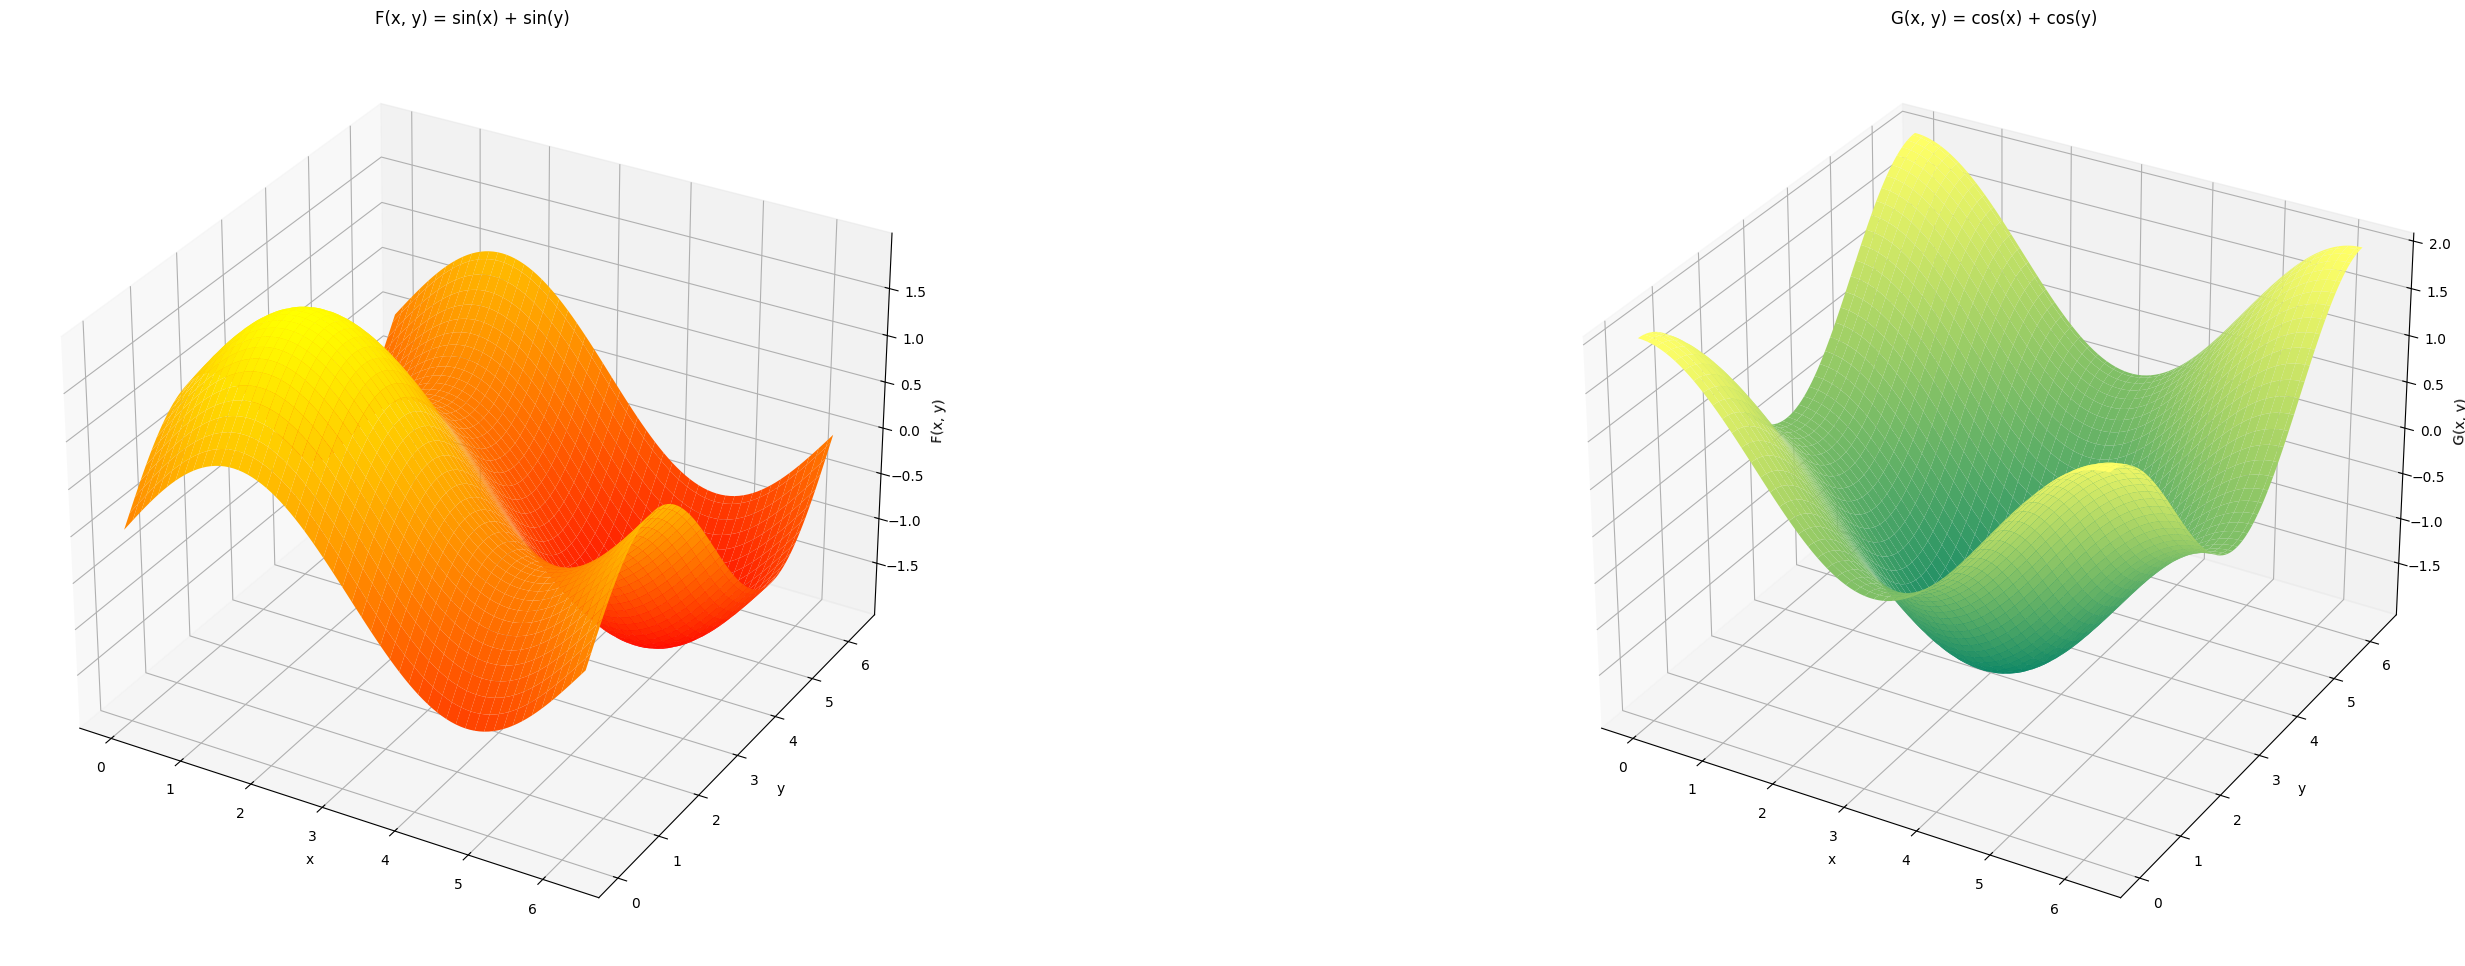

In [5]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(36, 12))

# plot sin(x) + sin(y)
F = np.sin(X) + np.sin(Y)
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, F, cmap='autumn', edgecolor='none')
ax1.set_title('F(x, y) = sin(x) + sin(y)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('F(x, y)')

# plot cos(x) + cos(y)
G = np.cos(X) + np.cos(Y)
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, G, cmap='summer', edgecolor='none')
ax2.set_title('G(x, y) = cos(x) + cos(y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('G(x, y)');